In [1]:
!pip install tensorflow==2.12.0

In [2]:
!pip install yfinance

In [3]:
import yfinance as yf

# 티커(symbol) 설정 (예: 애플 'AAPL')
ticker = "AAPL"

# 데이터 다운로드
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 데이터 확인
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.632523,129.395510,122.742865,128.782641,112117500
2023-01-04,124.907700,127.181268,123.642412,125.431607,89113600
2023-01-05,123.583099,126.301493,123.326093,125.668849,80962700
2023-01-06,128.130234,128.792531,123.454601,124.561732,87754700
2023-01-09,128.654129,131.876670,128.397123,128.970458,70790800


In [4]:
df = data["Close"]["AAPL"]

In [5]:
stock = yf.Ticker("AAPL")

# 실시간 ? 현재 주가 정보 가져오기
current_price = stock.history(period="1d")["Close"][-1]

print(f"AAPL 현재 주가: {current_price}")

AAPL 현재 주가: 236.8699951171875


<ipython-input-5-516121196de1>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = stock.history(period="1d")["Close"][-1]


In [6]:
stock = yf.Ticker("AAPL")

# 30분봉 데이터 가져오기 (지난 7일 기준)
intraday_data = stock.history(period="60d", interval="5m")

intraday_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-11-14 09:30:00-05:00,225.070007,226.440002,225.070007,226.210007,2827785,0.0,0.0
2024-11-14 09:35:00-05:00,226.220001,226.479996,225.445999,226.380005,741794,0.0,0.0
2024-11-14 09:40:00-05:00,226.369995,226.410004,225.660004,225.750000,624784,0.0,0.0
2024-11-14 09:45:00-05:00,225.759995,226.179901,225.759995,226.039993,405622,0.0,0.0
2024-11-14 09:50:00-05:00,226.029999,226.289993,225.915100,225.960007,523090,0.0,0.0


In [7]:
intraday_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4608 entries, 2024-11-14 09:30:00-05:00 to 2025-02-12 15:55:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4608 non-null   float64
 1   High          4608 non-null   float64
 2   Low           4608 non-null   float64
 3   Close         4608 non-null   float64
 4   Volume        4608 non-null   int64  
 5   Dividends     4608 non-null   float64
 6   Stock Splits  4608 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 288.0 KB


In [8]:
import os
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'

## Trading Bot

In [61]:
import oandaenv as oe

In [62]:
symbol = 'Close'

In [63]:
features = [symbol, 'r', 's', 'm', 'v']

In [64]:
s = 0
t = 2700
v = 900

In [65]:
%%time
learn_env = oe.OandaEnv(data=intraday_data,
                  symbol=symbol,
                  start=s,
                  end=s+t,
                  granularity='5M',
                  price='M',
                  features=features,
                  window=20,
                  lags=3,
                  min_accuracy=0.4,
                  min_performance=0.85
                 )

CPU times: user 23 ms, sys: 28 µs, total: 23 ms
Wall time: 23.5 ms


In [66]:
learn_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2700 entries, 2024-11-14 11:10:00-05:00 to 2025-01-07 14:35:00-05:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2700 non-null   float64
 1   r       2700 non-null   float64
 2   s       2700 non-null   float64
 3   m       2700 non-null   float64
 4   v       2700 non-null   float64
 5   d       2700 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 147.7 KB


In [67]:
valid_env = oe.OandaEnv(data=intraday_data,
                  symbol=learn_env.symbol,
                  start=s+t,
                  end=s+t+v,
                  granularity=learn_env.granularity,
                  price=learn_env.price,
                  features=learn_env.features,
                  window=learn_env.window,
                  lags=learn_env.lags,
                  min_accuracy=0,
                  min_performance=0,
                  mu=learn_env.mu,
                  std=learn_env.std
                 )

In [68]:
valid_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900 entries, 2025-01-07 14:40:00-05:00 to 2025-01-27 11:35:00-05:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   900 non-null    float64
 1   r       900 non-null    float64
 2   s       900 non-null    float64
 3   m       900 non-null    float64
 4   v       900 non-null    float64
 5   d       900 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 49.2 KB


In [69]:
test_env = oe.OandaEnv(data=intraday_data,
                  symbol=learn_env.symbol,
                  start=s+t+v,
                  end=None,
                  granularity=learn_env.granularity,
                  price=learn_env.price,
                  features=learn_env.features,
                  window=learn_env.window,
                  lags=learn_env.lags,
                  min_accuracy=0,
                  min_performance=0,
                  mu=learn_env.mu,
                  std=learn_env.std
                 )

In [70]:
test_env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 988 entries, 2025-01-27 11:40:00-05:00 to 2025-02-12 15:55:00-05:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   988 non-null    float64
 1   r       988 non-null    float64
 2   s       988 non-null    float64
 3   m       988 non-null    float64
 4   v       988 non-null    float64
 5   d       988 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 54.0 KB


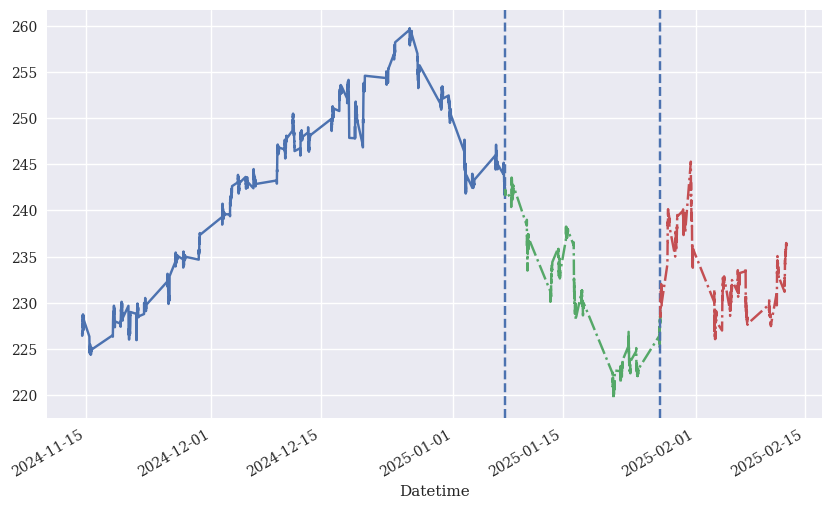

In [71]:
ax = learn_env.data[learn_env.symbol].plot(figsize=(10, 6))
plt.axvline(learn_env.data.index[-1], ls='--')
valid_env.data[learn_env.symbol].plot(ax=ax, style='-.')
plt.axvline(valid_env.data.index[-1], ls='--')
test_env.data[learn_env.symbol].plot(ax=ax, style='-.');

In [72]:
import tradingbot

In [73]:
tradingbot.set_seeds(100)
agent = tradingbot.TradingBot(24, 0.001, learn_env=learn_env,
                              valid_env=valid_env)

In [74]:
episodes = 60

In [75]:
%time agent.learn(episodes)

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


episode: 10/60 | VALIDATION | treward:  897 | perf: 0.996 | eps: 0.92
episode: 20/60 | VALIDATION | treward:  897 | perf: 0.966 | eps: 0.83
episode: 30/60 | VALIDATION | treward:  897 | perf: 0.960 | eps: 0.75
episode: 40/60 | VALIDATION | treward:  897 | perf: 0.959 | eps: 0.68
episode: 50/60 | VALIDATION | treward:  897 | perf: 0.961 | eps: 0.62
episode: 60/60 | VALIDATION | treward:  897 | perf: 0.955 | eps: 0.56

CPU times: user 4min 20s, sys: 5.47 s, total: 4min 25s
Wall time: 4min 19s


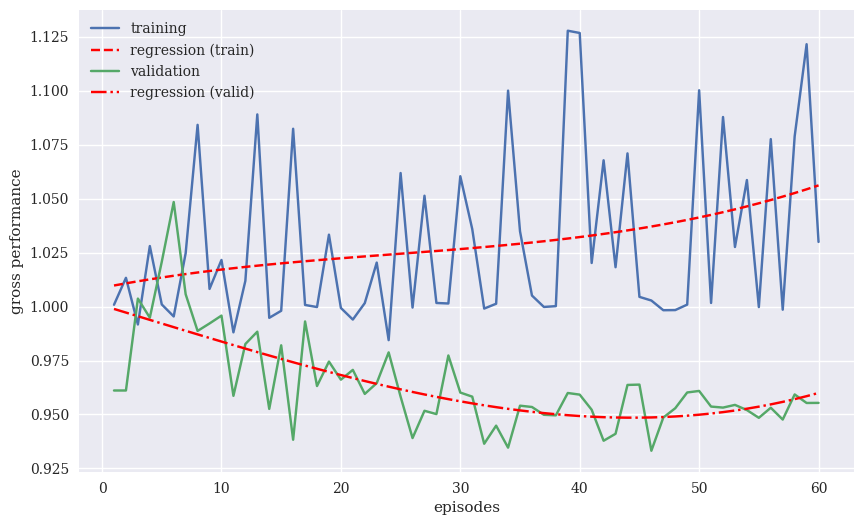

In [76]:
tradingbot.plot_performance(agent)

## Vectorized Backtesting

In [77]:
import backtest as bt

In [78]:
env = test_env

In [79]:
bt.backtest(agent, env)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  env.data.loc[:, 'p'].iloc[env.bar] = position
/content/backtest.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a singl

In [80]:
env.data['p'].iloc[env.lags:].value_counts()

,count
p,
1,698
0,287


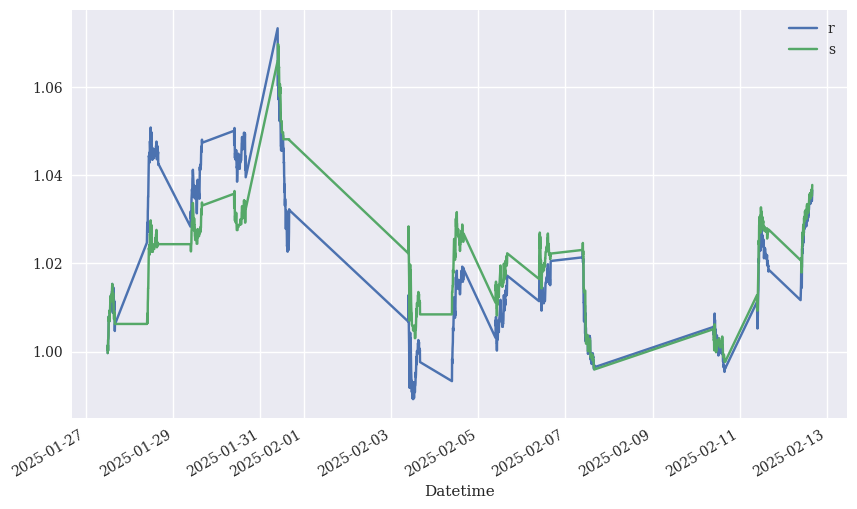

In [81]:
(env.data[['r', 's']].iloc[env.lags:]).cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));

## Event-Based Backtesting

In [82]:
import backtesting as bt

## Assessing Risk

In [83]:
data = pd.DataFrame(learn_env.data[symbol])

In [84]:
data.head()

,Close
Datetime,
2024-11-14 11:10:00-05:00,226.6800
2024-11-14 11:15:00-05:00,226.6513
2024-11-14 11:20:00-05:00,226.6900
2024-11-14 11:25:00-05:00,226.4200
2024-11-14 11:30:00-05:00,226.6600


In [85]:
window = 14

In [86]:
data['min'] = data[symbol].rolling(window).min()

In [87]:
data['max'] = data[symbol].rolling(window).max()

In [88]:
data['mami'] = data['max'] - data['min']

In [89]:
data['mac'] = abs(data['max'] - data[symbol].shift(1))

In [90]:
data['mic'] = abs(data['min'] - data[symbol].shift(1))

In [91]:
data['atr'] = np.maximum(data['mami'], data['mac'])

In [92]:
data['atr'] = np.maximum(data['atr'], data['mic'])

In [93]:
(data['atr'] == data['mami']).value_counts()

,count
True,2687
False,13


In [94]:
data['atr%'] = data['atr'] / data[symbol]

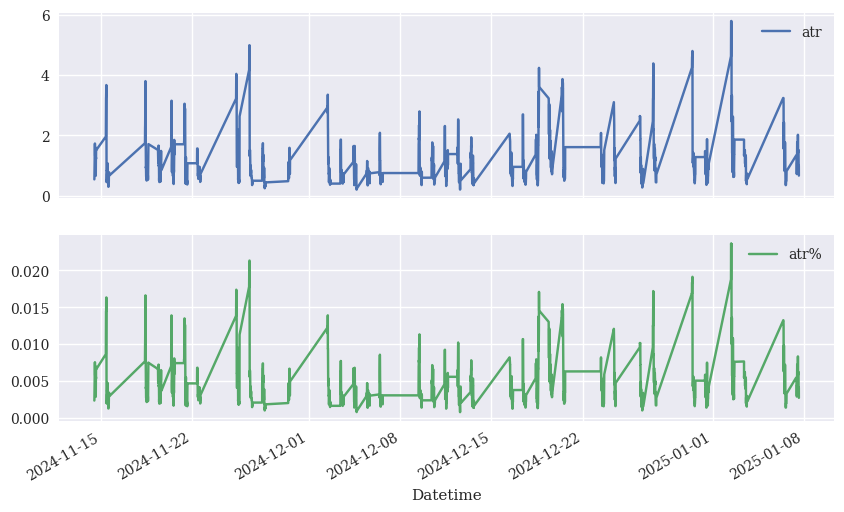

In [95]:
data[['atr', 'atr%']].plot(subplots=True, figsize=(10, 6));

In [96]:
data[['atr', 'atr%']].tail()

,atr,atr%
Datetime,,
2025-01-07 14:15:00-05:00,1.0150,0.0042
2025-01-07 14:20:00-05:00,1.0150,0.0042
2025-01-07 14:25:00-05:00,1.0150,0.0042
2025-01-07 14:30:00-05:00,0.9655,0.0040
2025-01-07 14:35:00-05:00,0.6650,0.0027


In [97]:
data[['atr', 'atr%']].median()

,0
atr,0.9004
atr%,0.0037


## Backtesting Risk Measures

In [98]:
import tbbacktesterrm as tbbrm

In [99]:
env = test_env

In [100]:
agent.model

In [101]:
tb = tbbrm.TBBacktesterRM(env, agent.model, 10000,
                          0.00093, 0, verbose=True)

In [102]:
tb.backtest_strategy(sl=None, tsl=None, tp=None, wait=5)

2025-01-27 | *** START BACKTEST ***
2025-01-27 | current balance = 10000.00
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 228.5260
2025-01-27 | current balance = 164.24
2025-01-27 | net wealth = 9987.38
--------------------------------------------------
2025-01-27 | *** sell ***
2025-01-27 | sell 43 units for 231.2000
2025-01-27 | current balance = 10096.60
2025-01-27 | net wealth = 10096.60
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 230.5400
2025-01-27 | current balance = 174.16
2025-01-27 | net wealth = 10102.43
--------------------------------------------------
2025-01-27 | *** sell ***
2025-01-27 | sell 43 units for 230.8900
2025-01-27 | current balance = 10093.20
2025-01-27 | net wealth = 10093.20
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 231.8500
2025-01-27 | current balance = 114.37
2025-01-27 |

### Stop Loss

In [111]:
tb.backtest_strategy(sl=0.0037, tsl=None, tp=None,
                     wait=5, guarantee=False)

2025-01-27 | *** START BACKTEST ***
2025-01-27 | current balance = 10000.00
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 228.5260
2025-01-27 | current balance = 164.24
2025-01-27 | net wealth = 9987.38
--------------------------------------------------
2025-01-27 | *** sell ***
2025-01-27 | sell 43 units for 231.2000
2025-01-27 | current balance = 10096.60
2025-01-27 | net wealth = 10096.60
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 230.5400
2025-01-27 | current balance = 174.16
2025-01-27 | net wealth = 10102.43
--------------------------------------------------
2025-01-27 | *** sell ***
2025-01-27 | sell 43 units for 230.8900
2025-01-27 | current balance = 10093.20
2025-01-27 | net wealth = 10093.20
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 231.8500
2025-01-27 | current balance = 114.37
2025-01-27 |

In [104]:
tb.backtest_strategy(sl=0.017, tsl=None, tp=None,
                     wait=5, guarantee=True)

2025-01-27 | *** START BACKTEST ***
2025-01-27 | current balance = 10000.00
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 228.5260
2025-01-27 | current balance = 164.24
2025-01-27 | net wealth = 9987.38
--------------------------------------------------
2025-01-27 | *** sell ***
2025-01-27 | sell 43 units for 231.2000
2025-01-27 | current balance = 10096.60
2025-01-27 | net wealth = 10096.60
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 230.5400
2025-01-27 | current balance = 174.16
2025-01-27 | net wealth = 10102.43
--------------------------------------------------
2025-01-27 | *** sell ***
2025-01-27 | sell 43 units for 230.8900
2025-01-27 | current balance = 10093.20
2025-01-27 | net wealth = 10093.20
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 231.8500
2025-01-27 | current balance = 114.37
2025-01-27 |

### Trailing Stop Loss

In [105]:
tb.backtest_strategy(sl=None, tsl=0.015,
                     tp=None, wait=5)

2025-01-27 | *** START BACKTEST ***
2025-01-27 | current balance = 10000.00
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 228.5260
2025-01-27 | current balance = 164.24
2025-01-27 | net wealth = 9987.38
--------------------------------------------------
2025-01-27 | *** sell ***
2025-01-27 | sell 43 units for 231.2000
2025-01-27 | current balance = 10096.60
2025-01-27 | net wealth = 10096.60
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 230.5400
2025-01-27 | current balance = 174.16
2025-01-27 | net wealth = 10102.43
--------------------------------------------------
2025-01-27 | *** sell ***
2025-01-27 | sell 43 units for 230.8900
2025-01-27 | current balance = 10093.20
2025-01-27 | net wealth = 10093.20
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 231.8500
2025-01-27 | current balance = 114.37
2025-01-27 |

### Take Profit

In [106]:
tb.backtest_strategy(sl=None, tsl=None, tp=0.015,
                     wait=5, guarantee=False)

2025-01-27 | *** START BACKTEST ***
2025-01-27 | current balance = 10000.00
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 228.5260
2025-01-27 | current balance = 164.24
2025-01-27 | net wealth = 9987.38
--------------------------------------------------
*** TAKE PROFIT (LONG  | 0.0153) ***
2025-01-27 | sell 43 units for 232.0300
2025-01-27 | current balance = 10132.25
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 230.5400
2025-01-27 | current balance = 209.82
2025-01-27 | net wealth = 10138.09
--------------------------------------------------
2025-01-27 | *** sell ***
2025-01-27 | sell 43 units for 230.8900
2025-01-27 | current balance = 10128.85
2025-01-27 | net wealth = 10128.85
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 231.8500
2025-01-27 | current balance = 150.03
2025-01-27 | net wealth = 10103.24
-

In [107]:
tb.backtest_strategy(sl=None, tsl=None, tp=0.015,
                     wait=5, guarantee=True)

2025-01-27 | *** START BACKTEST ***
2025-01-27 | current balance = 10000.00
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 228.5260
2025-01-27 | current balance = 164.24
2025-01-27 | net wealth = 9987.38
--------------------------------------------------
*** TAKE PROFIT (LONG  | 0.0150) ***
2025-01-27 | sell 43 units for 231.9539
2025-01-27 | current balance = 10128.98
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 230.5400
2025-01-27 | current balance = 206.55
2025-01-27 | net wealth = 10134.82
--------------------------------------------------
2025-01-27 | *** sell ***
2025-01-27 | sell 43 units for 230.8900
2025-01-27 | current balance = 10125.58
2025-01-27 | net wealth = 10125.58
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 231.8500
2025-01-27 | current balance = 146.76
2025-01-27 | net wealth = 10099.97
-

## Combinations

In [108]:
tb.backtest_strategy(sl=0.015, tsl=None,
                     tp=0.0185, wait=5)

2025-01-27 | *** START BACKTEST ***
2025-01-27 | current balance = 10000.00
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 228.5260
2025-01-27 | current balance = 164.24
2025-01-27 | net wealth = 9987.38
--------------------------------------------------
2025-01-27 | *** sell ***
2025-01-27 | sell 43 units for 231.2000
2025-01-27 | current balance = 10096.60
2025-01-27 | net wealth = 10096.60
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 230.5400
2025-01-27 | current balance = 174.16
2025-01-27 | net wealth = 10102.43
--------------------------------------------------
2025-01-27 | *** sell ***
2025-01-27 | sell 43 units for 230.8900
2025-01-27 | current balance = 10093.20
2025-01-27 | net wealth = 10093.20
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 231.8500
2025-01-27 | current balance = 114.37
2025-01-27 |

In [109]:
tb.backtest_strategy(sl=None, tsl=0.02,
                     tp=0.02, wait=5)

2025-01-27 | *** START BACKTEST ***
2025-01-27 | current balance = 10000.00
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 228.5260
2025-01-27 | current balance = 164.24
2025-01-27 | net wealth = 9987.38
--------------------------------------------------
2025-01-27 | *** sell ***
2025-01-27 | sell 43 units for 231.2000
2025-01-27 | current balance = 10096.60
2025-01-27 | net wealth = 10096.60
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 230.5400
2025-01-27 | current balance = 174.16
2025-01-27 | net wealth = 10102.43
--------------------------------------------------
2025-01-27 | *** sell ***
2025-01-27 | sell 43 units for 230.8900
2025-01-27 | current balance = 10093.20
2025-01-27 | net wealth = 10093.20
--------------------------------------------------
2025-01-27 | *** buy ***
2025-01-27 | buy 43 units for 231.8500
2025-01-27 | current balance = 114.37
2025-01-27 |

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import pickle

In [114]:
agent.model.save("/content/drive/MyDrive/saved_model/model.h5")
agent.model = None
with open("/content/drive/MyDrive/saved_model/bot.pkl", "wb") as f:
    pickle.dump(agent, f)